<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240415_CNN_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### google drive mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Vision_AZ

/content/gdrive/MyDrive/Colab Notebooks/Vision_AZ


### library

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# HW

## load data

In [4]:
path = './Datasets/cat_dog_2.zip'
zip_obj = zipfile.ZipFile(file = path, mode = 'r')
zip_obj.extractall('./')
zip_obj.close()

## generate dataset (+ nomarlizing)

In [7]:
train_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 7, horizontal_flip= True, zoom_range= 0.2, vertical_flip= True)
test_generator = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_generator.flow_from_directory(directory = './cat_dog_2/training_set/', target_size = (64,64),
                                                    class_mode = 'categorical', batch_size = 32,
                                                    shuffle = True)

Found 4000 images belonging to 2 classes.


In [10]:
test_set = test_generator.flow_from_directory(directory = './cat_dog_2/test_set/', target_size = (64,64), batch_size = 1, class_mode = 'categorical', shuffle = False)

Found 1000 images belonging to 2 classes.


## split train, test dataset

## train Cnn

### generate CNN

In [12]:
(6272 +2) /2

3137.0

In [13]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu', input_shape = (64,64,3)))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))

cnn.add(Flatten())

cnn.add(Dense(units = 3137, activation = 'relu'))
cnn.add(Dense(units = 2, activation = 'softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 3137)             

### compile model

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### training

In [16]:
history = cnn.fit_generator(training_set, epochs = 50)

<ipython-input-16-38385fb58c02>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(training_set, epochs = 50)


Epoch 1/50
125/125 [==============================] - 26s 173ms/step - loss: 0.7333 - accuracy: 0.4990
Epoch 2/50
125/125 [==============================] - 21s 171ms/step - loss: 0.6874 - accuracy: 0.5530
Epoch 3/50
125/125 [==============================] - 22s 178ms/step - loss: 0.6556 - accuracy: 0.6162
Epoch 4/50
125/125 [==============================] - 22s 174ms/step - loss: 0.6444 - accuracy: 0.6317
Epoch 5/50
125/125 [==============================] - 22s 177ms/step - loss: 0.6164 - accuracy: 0.6610
Epoch 6/50
125/125 [==============================] - 22s 173ms/step - loss: 0.6074 - accuracy: 0.6600
Epoch 7/50
125/125 [==============================] - 22s 176ms/step - loss: 0.5906 - accuracy: 0.6852
Epoch 8/50
125/125 [==============================] - 21s 171ms/step - loss: 0.5832 - accuracy: 0.6873
Epoch 9/50
125/125 [==============================] - 22s 178ms/step - loss: 0.5780 - accuracy: 0.6890
Epoch 10/50
125/125 [==============================] - 22s 174ms/step - l

## Varidation

In [17]:
pred = cnn.predict(test_set)

1000/1000 [==============================] - 5s 5ms/step


In [21]:
pred = np.argmax(pred,axis = 1) # 열끼리 비교했을 때 최대값에 1
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [18]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(test_set.classes, pred)

0.734

<Axes: >

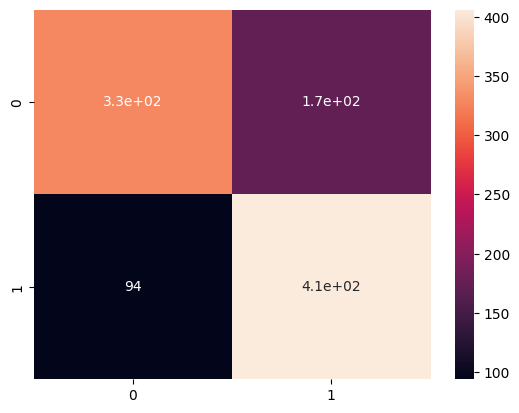

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_set.classes, pred)
sns.heatmap(cm, annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       500
           1       0.70      0.81      0.75       500

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000

